In [19]:
from google.colab import files
from IPython.display import Image

Image(url="https://raw.githubusercontent.com/dpsharma15/Gradient_Descent/main/Gradient_Descent.png")



Here in this image we can see that $f$ is function with parameter $\beta$. If we change $\beta$ by a small amount $\Delta\beta$, function changes by $\Delta f$. As long as we ensure that $\Delta\beta$ is small, we can assume the triangle shown with sides $\Delta\beta$ and $\Delta f$, is right angle triangle, and we can write:

$$
\tan(\theta) = \frac{\Delta f}{\Delta\beta} \quad (1)
$$

For very small $\Delta\beta$ we can write $\tan(\theta)$ in terms of gradient as follows:

$$
\tan(\theta) = \frac{\partial f}{\partial\beta} \quad (2)
$$

Equating this to (1) and after doing a little adjustment we get:

$$
\Delta f = \frac{\partial f}{\partial\beta}\Delta\beta \quad (3)
$$

If there were multiple parameters involved, say $\beta_1$ and $\beta_2$, then changing those parameters will individually contribute to changing the function:

$$
\Delta f = \frac{\partial f}{\partial\beta_1}\Delta\beta_1 + \frac{\partial f}{\partial\beta_2}\Delta\beta_2 \quad (4)
$$

This can be written as dot product between two vectors, respectively known as gradient and change in parameters:

$$
\nabla f = \left( \frac{\partial f}{\partial\beta_1}, \frac{\partial f}{\partial\beta_2} \right)
$$

$$
\Delta\beta = (\Delta\beta_1, \Delta\beta_2)
$$

Equation (4) can be rewritten as:

$$
\Delta f = \nabla f \cdot \Delta\beta \quad (5)
$$

This is not some expression that you haven't seen before. In fact, we use it in our daily lives all the time. This expression simply means that, if we change our parameter by some amount, change in function can be calculated by multiplying change in parameter with gradient of the function w.r.t. the parameter.

Where do we use that in real life?

When somebody asks you to find how much distance you covered if you were traveling at 4 km/minute for 20 minutes, you simply tell them 80 km. Here distance is nothing but function of time:

$$
\Delta f = 80\text{km} \quad \Delta\beta = 20\text{min}
$$

The speed is nothing but rate of change of distance w.r.t. time, or in other words, gradient of distance w.r.t. time:

$$
\nabla f = 4\text{km/minute} \quad \text{[gradient is nothing but rate of change!]}
$$

You must be wondering, why are we talking about all of this? Equation (5) is magical. This gives us an idea about how we can change our parameters such that cost function always goes down. Consider:

$$
\Delta\beta = -\eta \nabla f \quad (6)
$$

Where $\eta$ is some positive constant. If we put this back in (5), let's see what happens:

$$
\Delta f = \nabla f \cdot \Delta\beta = -\eta \nabla f \cdot \nabla f = -\eta \|\nabla f\|^2 \quad (7)
$$

Equation (7) is an amazing result. It tells us that if we changed our parameter as per the suggestion in (6), change in function will always be negative. This gives us a consistent way of changing our parameters so that our cost function always goes down. Once we start to reach near the optimal value, gradient of the cost function $\nabla f$ will tend to zero and our parameter will stop to change.

Now we have consistent method for starting from random values of $\beta$s and changing them in such a way that we eventually arrive at optimal values of $\beta$s for given historical data. Let's see whether it really works or not with an example in context of linear regression.



---
Numerical Example:
---

### Numerical Example of Gradient Descent for $Y = x^2$

**Objective:** Find the minimum value of x for which  $Y = x^2$ will take minimum value using gradient descent

1. **Initial Setup:**
   - Initial guess: $x_0 = 3$
   - Learning rate ($\eta$): 0.1
   - Number of iterations: 5

2. **Gradient Calculation:**
   - $\frac{dY}{dx} = 2x$

3. **Iteration Steps:**

| Iteration | Current x | Gradient (2x) | Update (-η·gradient) | New x     | Y value  |
|-----------|-----------|---------------|-----------------------|-----------|----------|
| 1         | 3.0       | 6.0           | -0.6                  | 2.4       | 5.76     |
| 2         | 2.4       | 4.8           | -0.48                 | 1.92      | 3.6864   |
| 3         | 1.92      | 3.84          | -0.384                | 1.536     | 2.3593   |
| 4         | 1.536     | 3.072         | -0.3072               | 1.2288    | 1.5099   |
| 5         | 1.2288    | 2.4576        | -0.24576              | 0.98304   | 0.9664   |

After 5 iterations, we've moved from $x=3$ ($Y=9$) to $x≈0.983$ ($Y≈0.966$), approaching the minimum at $x=0$.



In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Define the function and its derivative
def f(x):
    return x ** 2

def df(x):
    return 2 * x  # Gradient (derivative)

# Gradient descent parameters
x_start = 3.0
learning_rate = 0.1
n_iterations = 15

# Store optimization path
path = []
x = x_start
for _ in range(n_iterations):
    path.append((x, f(x), df(x)))
    x = x - learning_rate * df(x)

# Set up the figure
fig, ax = plt.subplots(figsize=(8, 3)) # Reduced figure size
x_vals = np.linspace(-3.5, 3.5, 100)
ax.plot(x_vals, f(x_vals), 'b-', label='$Y = x^2$')
ax.set_xlabel('x')
ax.set_ylabel('Y')
ax.grid(True)
ax.legend(loc='upper right') # Set legend location

# Initialize elements for animation
point, = ax.plot([], [], 'ro', markersize=10)
tangent_line = ax.plot([], [], 'r--', linewidth=2)[0]
gradient_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)

def init():
    point.set_data([], [])
    tangent_line.set_data([], [])
    gradient_text.set_text('')
    return point, tangent_line, gradient_text

def update(i):
    x_point, y_point, grad = path[i]

    # Update point position
    point.set_data([x_point], [y_point])

    # Update tangent line (showing gradient)
    x_tangent = np.linspace(x_point - 1, x_point + 1, 2)
    y_tangent = grad * (x_tangent - x_point) + y_point
    tangent_line.set_data(x_tangent, y_tangent)

    # Update text
    gradient_text.set_text(f'Iteration: {i+1}\n'
                         f'x = {x_point:.2f}\n'
                         f'Gradient = {grad:.2f}\n'
                         f'Step = -η×grad = {-learning_rate * grad:.2f}')

    return point, tangent_line, gradient_text

# Create animation
ani = FuncAnimation(fig, update, frames=len(path),
                    init_func=init, blit=True, interval=1000)

# Display in notebook
plt.close()
HTML(ani.to_jshtml())

Iteration 1: x = 2.4000, y = 5.7600, gradient = 6.0000
Iteration 2: x = 1.9200, y = 3.6864, gradient = 4.8000
Iteration 3: x = 1.5360, y = 2.3593, gradient = 3.8400
Iteration 4: x = 1.2288, y = 1.5099, gradient = 3.0720
Iteration 5: x = 0.9830, y = 0.9664, gradient = 2.4576
Iteration 6: x = 0.7864, y = 0.6185, gradient = 1.9661
Iteration 7: x = 0.6291, y = 0.3958, gradient = 1.5729
Iteration 8: x = 0.5033, y = 0.2533, gradient = 1.2583
Iteration 9: x = 0.4027, y = 0.1621, gradient = 1.0066
Iteration 10: x = 0.3221, y = 0.1038, gradient = 0.8053
Iteration 11: x = 0.2577, y = 0.0664, gradient = 0.6442
Iteration 12: x = 0.2062, y = 0.0425, gradient = 0.5154
Iteration 13: x = 0.1649, y = 0.0272, gradient = 0.4123
Iteration 14: x = 0.1319, y = 0.0174, gradient = 0.3299
Iteration 15: x = 0.1056, y = 0.0111, gradient = 0.2639
Iteration 16: x = 0.0844, y = 0.0071, gradient = 0.2111
Iteration 17: x = 0.0676, y = 0.0046, gradient = 0.1689
Iteration 18: x = 0.0540, y = 0.0029, gradient = 0.1351
I

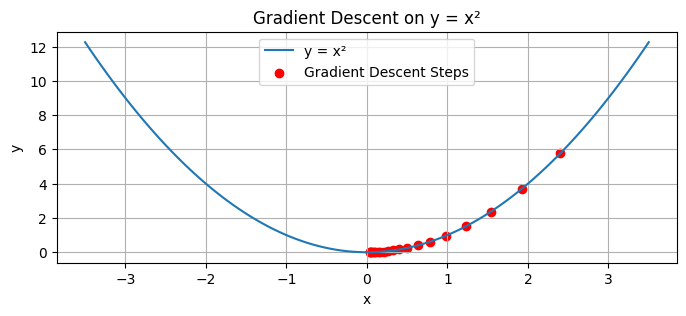


Final result: x = 0.034588, y = 0.001196


In [13]:
import numpy as np
import matplotlib.pyplot as plt

def gradient_descent(start_x, learning_rate, iterations):
    x = start_x
    history = []

    for i in range(iterations):
        gradient = 2*x  # Derivative of x^2
        x = x - learning_rate * gradient
        history.append((x, x**2))

        print(f"Iteration {i+1}: x = {x:.4f}, y = {x**2:.4f}, gradient = {gradient:.4f}")

    return x, history

# Parameters
start_x = 3.0
learning_rate = 0.1
iterations = 20

# Run gradient descent
optimal_x, history = gradient_descent(start_x, learning_rate, iterations)

# Visualization
x_vals = np.linspace(-3.5, 3.5, 100)
y_vals = x_vals**2

plt.figure(figsize=(8,3))
plt.plot(x_vals, y_vals, label='y = x²')
plt.scatter(*zip(*history), color='red', label='Gradient Descent Steps')
plt.title('Gradient Descent on y = x²')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

print(f"\nFinal result: x = {optimal_x:.6f}, y = {optimal_x**2:.6f}")